Assignment 2- Machine Learning for Data Analysis
======

Description of Dataset
----

## Source ##
For this assignment the Statlog (Heart) Data Set ([Link](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29)) obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) is used. 


## Description
### Attribute Information:
 1. age
 2. sex
 3. chest pain type  (4 values)
 4. resting blood pressure
 5. serum cholestoral in mg/dl
 6. fasting blood sugar > 120 mg/dl
 7. resting electrocardiographic results  (values 0,1,2)
 8. maximum heart rate achieved
 9. exercise induced angina
 10. oldpeak = ST depression induced by exercise relative to rest
 11. the slope of the peak exercise ST segment
 12. number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 
### Variable to be predicted
Absence (1) or presence (2) of heart disease

# Code

In [19]:
#Importing Pandas
from pandas import Series, DataFrame
import pandas as pd

#Importing NumPy
import numpy as np

# Matplotlib to plot
import matplotlib.pylab as plt

#Importing sklearn 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

Reading the dataset as raw_data as assigning names of attributes to each coloumn. Also visualising at top five rows of the data. 

In [2]:
raw_data = pd.read_csv("heart.dat", delimiter=' ', names = ["age", "sex", "chestPainType", "RestBP", "SerumCholesterol", "FastingBP", "RestingECG", "MaxHR", "ExerciseInduceAgina", "Oldepeak", "SlopSTSegment", "NoVessels", "Thal", "Result"])

raw_data.head()

,age,sex,chestPainType,RestBP,SerumCholesterol,FastingBP,RestingECG,MaxHR,ExerciseInduceAgina,Oldepeak,SlopSTSegment,NoVessels,Thal,Result
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
raw_data.describe()

,age,sex,chestPainType,RestBP,SerumCholesterol,FastingBP,RestingECG,MaxHR,ExerciseInduceAgina,Oldepeak,SlopSTSegment,NoVessels,Thal,Result
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


Creating dataframe without the target (col name = results)

In [4]:
predictors = raw_data.drop(["Result"], axis=1)
#Shape of the data.
predictors.shape

(270, 13)

Storing target values in new array

In [5]:
targets = raw_data.Result

Splitting data into training and test set 60:40. 

In [6]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [7]:
print (pred_train.shape,pred_test.shape,tar_train.shape,tar_test.shape)

(162, 13) (108, 13) (162,) (108,)


Defining and fitting the RanfomForest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=25)
clf=clf.fit(pred_train,tar_train)

making preditions for the test set. 

In [12]:
predictions=clf.predict(pred_test)

Printing the confusion metrics. 

In [13]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[57,  0],
       [14, 37]])

**The results shows the model has correctly predicted 57 True Postive and 37 True Negatives. But, there are 14 False predictions all of them are False Negatives **

In [14]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.87037037037037035

** Overall accurace of the model is around 87%. **

In [17]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.07906407  0.03976226  0.09270595  0.06406752  0.06693677  0.025708
  0.05645695  0.07426804  0.08421052  0.09184172  0.05829678  0.10194313
  0.1647383 ]


** Below you can see the table with importance of each feature.**
<a id='imp'></a>


In [61]:
ListofPredictors = list(predictors)
ListofPredictors = np.array(ListofPredictors)
k = np.array(model.feature_importances_)

df = pd.DataFrame(data=[k], columns=ListofPredictors)
df

,age,sex,chestPainType,RestBP,SerumCholesterol,FastingBP,RestingECG,MaxHR,ExerciseInduceAgina,Oldepeak,SlopSTSegment,NoVessels,Thal
0,0.079064,0.039762,0.092706,0.064068,0.066937,0.025708,0.056457,0.074268,0.084211,0.091842,0.058297,0.101943,0.164738


# Running RandomForest Classifier with series of different no. of Trees.

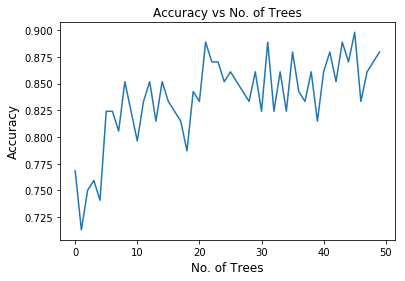

In [69]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(50)
accuracy=np.zeros(50)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

plt.cla()
plt.plot(trees, accuracy)
plt.xlabel ('No. of Trees', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.title('Accuracy vs No. of Trees')




In [70]:
print (accuracy.max())

0.898148148148


In [71]:
print (accuracy.mean())

0.836481481481


# Interpretation

In these set of analysis Randomforest methodology was used to examine the importance set of variable/descriptors in predicting heart disease. The set of descriptor use in these calculations are decribed at the start of the post. 

It is worth noting that when RandomForest model with only 25 trees were built the accuracy of model was only 87%. But when the model was built with 50 trees the accuracy of the model was increase to 89%. 

The most important feature [here](#imp) is Tallasimia in the patient followed by No. blocked vessels. 

